## Q&A Activity Question Week -10

    Do the following on the dataset
    
    1. Load the data into the pandas environment and identify some basic details of the dataset.
    2. Reset the index as "name" as the index.
    3. Select rows for specific names Jack Morgan and Josh wills.
    4. Select data for multiple values "Sales" and “Finance”.
    5. Display employee who has more than 700 performance score.
    6. Display employee who has more than 500 and less than 700 performance score
    7. Check and handle missing values in the dataset.
    8. Check the outliers and handle outliers in performance score using Percentiles.
    9. Check the gender column and do Dummy encoding.
    10.Do the standard scaling on the feature performance score.

Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

### 1. Load the data into the pandas environment and identify some basic details of the dataset.

##### Loading data into pandas environment

In [2]:
data=pd.read_csv('employee.csv')

# Dataset employee is in same folder as python file 

##### Checking basic details of the dataset

In [3]:
data.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [4]:
data.shape

(9, 7)

In [5]:
data.columns

Index(['name', 'age', 'income', 'gender', 'department', 'grade',
       'performance_score'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


####  Insight:
    Data set contains  7 columns and 9 rows, of which 4 columns dont have any null values and 3 has 2 null values each
    

### 2. Reset the index as "name" as the index.

In [7]:
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [8]:
# Resetting the index to column 'name'

data.set_index('name', inplace=True)

In [9]:
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 3. Select rows for specific names Jack Morgan and Josh wills.

In [10]:
data.loc[['Jack Morgan','Josh Wills'],:]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


### 4. Select data for multiple values "Sales" and “Finance”.

In [11]:
data1 = data[data['department'].isin(['Sales','Finance'])]
data1

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 5. Display employee who has more than 700 performance score.

In [12]:
data2=data[data['performance_score']>700].index
for i in data2:
    print(i)

Allen Smith
Dheeraj Patel
Josh Wills
Leo Duck


### 6. Display employee who has more than 500 and less than 700 performance score

In [13]:
data2=data[(data['performance_score']>500) & (data['performance_score']<700)].index
for i in data2:
    print(i)

S Kumar
Jack Morgan
Ying Chin
Satyam Sharma


### 7. Check and handle missing values in the dataset.

In [14]:
data.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [15]:
data.dtypes

age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

    There are 3 columns having null values, out of which 2 columns are of datatype float and one 'object'

#### 1. Handling null values in column 'gender'

In [16]:
data['gender'].value_counts()

F    5
M    2
Name: gender, dtype: int64

    Although, gender is a categorical value and filling null values with mode is the usual apporach, for gender this doesn't seems as the best approach. Hence, all the null values in Gender column are going to be filled with “Not Available”

In [17]:
# filling null values using fillna() 

data["gender"].fillna("Not Available", inplace = True) 
  
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,Not Available,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,Not Available,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


#### 2. Handling null values in column 'age'

In [18]:
data['age'].mean()

40.42857142857143

In [19]:
data['age'].median()

45.0

In [20]:
data['age'].mode()

0    45.0
1    54.0
dtype: float64

From  the above data age=45 is both median and mode hence filling null values with this.

In [21]:
data["age"].fillna(data['age'].median(), inplace = True) 
  
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,Not Available,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,Not Available,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


#### 3. Handling null values in column 'income'

In [22]:
data.groupby('grade')['income'].mean()

grade
G0    16000.000000
G2    38500.000000
G3    59666.666667
G4    98000.000000
Name: income, dtype: float64

In [23]:
data.groupby('grade')['income'].median()

grade
G0    16000.0
G2    38500.0
G3    62000.0
G4    98000.0
Name: income, dtype: float64

Missing values in income column belong to category grade G3, so filling null values with mean of grade G3.

In [24]:
for i in ['income']:
    data[i]=data[i].fillna(data[data['grade']=='G3']['income'].mean()) 

In [25]:
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,59666.666667,Not Available,Operations,G3,723
S Kumar,45.0,16000.000000,F,Finance,G0,520
Jack Morgan,32.0,35000.000000,M,Finance,G2,674
Ying Chin,45.0,65000.000000,F,Sales,G3,556
Dheeraj Patel,30.0,42000.000000,F,Operations,G2,711
Satyam Sharma,45.0,62000.000000,Not Available,Sales,G3,649
James Authur,54.0,59666.666667,F,Operations,G3,53
Josh Wills,54.0,52000.000000,F,Finance,G3,901
Leo Duck,23.0,98000.000000,M,Sales,G4,709


In [26]:
data.groupby('grade')['income'].median()

grade
G0    16000.000000
G2    38500.000000
G3    59666.666667
G4    98000.000000
Name: income, dtype: float64

In [27]:
data.groupby('grade')['income'].mean()

grade
G0    16000.000000
G2    38500.000000
G3    59666.666667
G4    98000.000000
Name: income, dtype: float64

After handling null values, grade wise mean and median of income becomes equal.

### 8. Check the outliers and handle outliers in performance score using Percentiles.

In [28]:
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,59666.666667,Not Available,Operations,G3,723
S Kumar,45.0,16000.000000,F,Finance,G0,520
Jack Morgan,32.0,35000.000000,M,Finance,G2,674
Ying Chin,45.0,65000.000000,F,Sales,G3,556
Dheeraj Patel,30.0,42000.000000,F,Operations,G2,711
Satyam Sharma,45.0,62000.000000,Not Available,Sales,G3,649
James Authur,54.0,59666.666667,F,Operations,G3,53
Josh Wills,54.0,52000.000000,F,Finance,G3,901
Leo Duck,23.0,98000.000000,M,Sales,G4,709


In [29]:
data.describe()

,age,income,performance_score
count,9.000000,9.000000,9.000000
mean,41.444444,54370.370370,610.666667
std,10.760008,22740.348651,235.671912
min,23.000000,16000.000000,53.000000
25%,32.000000,42000.000000,556.000000
50%,45.000000,59666.666667,674.000000
75%,45.000000,62000.000000,711.000000
max,54.000000,98000.000000,901.000000


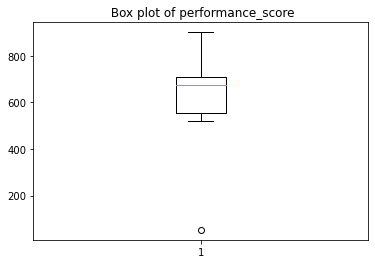

In [30]:
plt.boxplot(data['performance_score'])
plt.title(' Box plot of performance_score');

In [31]:
Q1=np.percentile(data['performance_score'],25,interpolation='midpoint')
Q2=np.percentile(data['performance_score'],50,interpolation='midpoint')
Q3=np.percentile(data['performance_score'],75,interpolation='midpoint')

In [32]:
print(Q1,Q2,Q3)

556.0 674.0 711.0


In [33]:
data['performance_score'].median()

674.0

In [34]:
IQR=Q3-Q1

In [35]:
low_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(low_limit)
print(upper_limit)

323.5
943.5


In [36]:
outlier=[]
for x in data['performance_score']:
    if (x>upper_limit) or (x<low_limit):
        outlier.append(x)

In [37]:
outlier

[53]

In [38]:
ind1=data['performance_score']<low_limit
data.loc[ind1].index

Index(['James Authur'], dtype='object', name='name')

In [39]:
data.drop(['James Authur'],inplace=True)

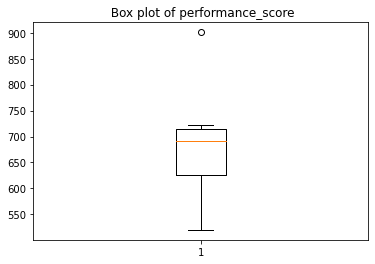

In [40]:
plt.boxplot(data['performance_score'])
plt.title(' Box plot of performance_score');

### 9. Check the gender column and do Dummy encoding.

In [41]:
#generate binary values using get_dummies

data1 = pd.get_dummies(data['gender'])
data1

,F,M,Not Available
name,,,
Allen Smith,0,0,1
S Kumar,1,0,0
Jack Morgan,0,1,0
Ying Chin,1,0,0
Dheeraj Patel,1,0,0
Satyam Sharma,0,0,1
Josh Wills,1,0,0
Leo Duck,0,1,0


In [42]:
#Concatenating the actual dataset with dummy variables.
data2=pd.concat([data,data1],axis='columns')
data2

,age,income,gender,department,grade,performance_score,F,M,Not Available
name,,,,,,,,,
Allen Smith,45.0,59666.666667,Not Available,Operations,G3,723,0,0,1
S Kumar,45.0,16000.000000,F,Finance,G0,520,1,0,0
Jack Morgan,32.0,35000.000000,M,Finance,G2,674,0,1,0
Ying Chin,45.0,65000.000000,F,Sales,G3,556,1,0,0
Dheeraj Patel,30.0,42000.000000,F,Operations,G2,711,1,0,0
Satyam Sharma,45.0,62000.000000,Not Available,Sales,G3,649,0,0,1
Josh Wills,54.0,52000.000000,F,Finance,G3,901,1,0,0
Leo Duck,23.0,98000.000000,M,Sales,G4,709,0,1,0


### 10.Do the standard scaling on the feature performance score.

In [43]:
data.columns

Index(['age', 'income', 'gender', 'department', 'grade', 'performance_score'], dtype='object')

In [44]:
x=data.drop(['age', 'income', 'gender','department', 'grade'], axis=1)

In [45]:
x.describe()

,performance_score
count,8.00000
mean,680.37500
std,116.16729
min,520.00000
25%,625.75000
50%,691.50000
75%,714.00000
max,901.00000


In [46]:
type(x)

pandas.core.frame.DataFrame

In [47]:
standardisation=preprocessing.StandardScaler()
x=standardisation.fit_transform(x)
x=pd.DataFrame(x)

In [48]:
x.describe()

,0
count,8.000000e+00
mean,4.857226e-17
std,1.069045e+00
min,-1.475872e+00
25%,-5.026938e-01
50%,1.023793e-01
75%,3.094385e-01
max,2.030331e+00


From the above data it can be seen that standardization changed the data such that standard deviation is 1 and data is distributed around mean